# WhatsApp Organizer

## 2- Model Creation & Training

In [ ]:
# loading the fastai library
from fastai.vision import *

#### Setting the Project Working Directory

In [2]:
path = Path(r'C:\Users\samir\Desktop\AI\whatsapp_organizer')

In [3]:
# Dateset Direcory for Training Data
dataset_dir = path/'datasets'
dataset_dir.mkdir(parents=True, exist_ok=True)
# Model Directory for Saving & Loading the model
models_dir = path/'models'
models_dir.mkdir(parents=True, exist_ok=True)

#### Setting Variables

In [ ]:
np.random.seed(42)
batch_size = 16

#### Creating the fastai Image Data Bunch (training object)

In [4]:
data = ImageDataBunch.from_folder(dataset_dir, train='.', valid_pct=0.2, ds_tfms=get_transforms(), size=244, bs=batch_size).normalize(imagenet_stats)

#### View Sample Training Dataset

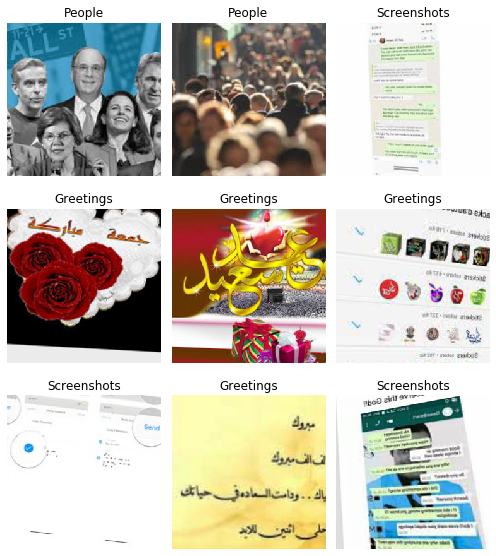

In [5]:
data.show_batch(rows=3, figsize=(7,8))

In [5]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Greetings', 'People', 'Screenshots'], 3, 1442, 360)

#### Creating the Conventional Neural Network Model

In [ ]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

#### Choosing the metrics for the training validation

In [6]:
from fastai.metrics import  error_rate

#### Training the model for 4 iterations

In [8]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.489063,0.210484,0.063889,01:03
1,0.351199,0.180886,0.058333,00:56
2,0.296827,0.162627,0.047222,00:55
3,0.213738,0.153980,0.058333,00:55


#### Saving the Model

In [9]:
learn.export(models_dir/'whatsapp_cleaner_stage-1.pkl')

#### Model Scoring

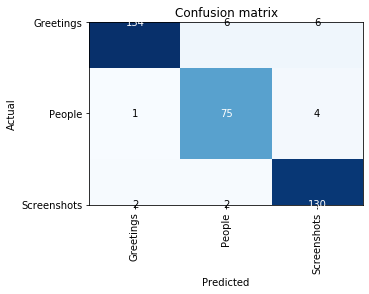

In [20]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()